# Proyecto 4 Ironhack. 
Visualizacion de Datos

### Parte 2. Analisis de los Datos Obtenidos
#### Ricardo Fuentes Carbó

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
sns.set()

In [3]:
"""
En esta parte del codigo lo que hacemos es primero cargar los datos que ya habiamos descargado previamente, despúes los unimos para
poder hacer un mejor analisis en conjunto, ya que lo que se busca es poder comparar las listas de reproduccion.
Y ahora si, podemos proceder a realizar algunas graficas. 
"""

# Primero leemos los archivos
# Iniciamos con Brenda
Bren_playlist = pd.read_csv('.\Brenda\Brenda_Tabla_Playlist.csv')
Bren_canciones= pd.read_csv('.\Brenda\Brenda_Tabla_Canciones_Playlist_Seleccionada.csv')
Bren_features_canciones = pd.read_csv('.\Brenda\Brenda_Tabla_Caracteristicas_Canciones.csv')
Bren_info_artistas= pd.read_csv('.\Brenda\Brenda_Tabla_Info_Artistas.csv')
# Agregamos la columna con el usuario para poder identificar posteriormente que df corresponde a quien
Bren_playlist['Usuario'] = 'Brenda'
Bren_canciones['Usuario'] = 'Brenda'
Bren_features_canciones['Usuario'] = 'Brenda'
Bren_info_artistas['Usuario'] = 'Brenda'

# Seguimos con los mios
Ricardo_playlist = pd.read_csv('.\Ricardo\Ricardo_Tabla_Playlist.csv')
Ricardo_canciones= pd.read_csv('.\Ricardo\Ricardo_Tabla_Canciones_Playlist_Seleccionada.csv')
Ricardo_features_canciones = pd.read_csv('.\Ricardo\Ricardo_Tabla_Caracteristicas_Canciones.csv')
Ricardo_info_artistas= pd.read_csv('.\Ricardo\Ricardo_Tabla_Info_Artistas.csv')
# Agregamos la columna con el usuario para poder identificar posteriormente que df corresponde a quien
Ricardo_playlist['Usuario'] = 'Ricardo'
Ricardo_canciones['Usuario'] = 'Ricardo'
Ricardo_features_canciones['Usuario'] = 'Ricardo'
Ricardo_info_artistas['Usuario'] = 'Ricardo'

# Creamos un solo df para cada tabla de informacion
df_playlist_general=pd.concat([Bren_playlist,Ricardo_playlist],axis=0).reset_index(drop=True)
df_canciones_general=pd.concat([Bren_canciones,Ricardo_canciones],axis=0).reset_index(drop=True)
df_features_canciones_general=pd.concat([Bren_features_canciones,Ricardo_features_canciones],axis=0).reset_index(drop=True)
df_info_artistas_general=pd.concat([Bren_info_artistas,Ricardo_info_artistas],axis=0).reset_index(drop=True)

# Los guardamos en csv para tambien poder analizarlos con PowerBI y/o Tableu
df_playlist_general.to_csv('.\General\Tabla_Playlist.csv')
df_canciones_general.to_csv('.\General\Canciones_General.csv')
df_features_canciones_general.to_csv('.\General\Features_Canciones.csv')
df_info_artistas_general.to_csv('.\General\Info_Artistas.csv')

## Iniciamos con unas Visualizaciones de la Info

In [4]:
df_canciones_general.head()

,Unnamed: 0,Tipo de Album,Nombre del Album,Tipo de Album.1,Duracion Cancion en MS,Explicita o No,id,Nombre Cancion,Popularidad Cancion,Duracion Cancion en MIN,ID Playlist,ID Artista,Nombre Artista,Usuario
0,0,single,Dibújame,album,236932,False,0RKglZdTQ7BLrs6vplb2qm,Dibújame,70,3.948867,6yk3BrGrCQ4TMCutpuIHXS,1FCItwxfRieMGhR0eRxotU,Rich Vagos,Brenda
1,1,single,Dibújame,album,236932,False,0RKglZdTQ7BLrs6vplb2qm,Dibújame,70,3.948867,6yk3BrGrCQ4TMCutpuIHXS,0zfvfy9XlborSqXNRhi8Bk,Samantha Barrón,Brenda
2,2,single,Dibújame,album,236932,False,0RKglZdTQ7BLrs6vplb2qm,Dibújame,70,3.948867,6yk3BrGrCQ4TMCutpuIHXS,1cUpGtXcSQsovNYEZOQgOG,Nanpa Básico,Brenda
3,3,single,Pa' Olvidarme De Ella,album,227233,True,1cVlW9WQiGlFdWUXFdFZGh,Pa' Olvidarme De Ella,84,3.787217,6yk3BrGrCQ4TMCutpuIHXS,4bw2Am3p9ji3mYsXNXtQcd,Piso 21,Brenda
4,4,single,Pa' Olvidarme De Ella,album,227233,True,1cVlW9WQiGlFdWUXFdFZGh,Pa' Olvidarme De Ella,84,3.787217,6yk3BrGrCQ4TMCutpuIHXS,0XwVARXT135rw8lyw1EeWP,Christian Nodal,Brenda


In [5]:
df_features_canciones_general.head()

,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,Usuario
0,0,0.831,0.417,8,-7.139,0,0.3950,0.7940,0.000000,0.108,0.484,147.993,0RKglZdTQ7BLrs6vplb2qm,Brenda
1,1,0.728,0.542,0,-5.195,1,0.0514,0.2590,0.000000,0.136,0.637,90.016,1cVlW9WQiGlFdWUXFdFZGh,Brenda
2,2,0.829,0.633,2,-3.895,1,0.0345,0.4780,0.407000,0.231,0.842,107.067,3Fc7UXQiievrLVVxmqCYFa,Brenda
3,3,0.697,0.621,9,-6.886,0,0.2500,0.0802,0.000000,0.162,0.721,81.946,4B4zDmbHdkXZ1wUJv1yKFy,Brenda
4,4,0.610,0.391,9,-11.878,1,0.0374,0.3190,0.000026,0.743,0.259,134.957,53wqj8xuyBZIpk8Ubp9gFp,Brenda


In [6]:
df_info_artistas_general.head()

,Unnamed: 0,Genero,ID Artista,Nombre Artista,Popularidad,Total de Seguidores,Usuario
0,0,"['colombian pop', 'latin', 'latin pop', 'regga...",4bw2Am3p9ji3mYsXNXtQcd,Piso 21,79,6347623,Brenda
1,1,"['british soul', 'pop', 'pop soul', 'uk pop']",4dpARuHxo51G3z768sgnrY,Adele,83,24528811,Brenda
2,2,"['cantautor', 'latin pop', 'trova', 'trova mex...",3C6Jn2YYPlZoe7pBPQl845,Raúl Ornelas,53,124195,Brenda
3,3,"['dance pop', 'pop', 'pop dance', 'pop rap', '...",07YZf4WDAMNwqr4jfgOZ8y,Jason Derulo,87,8556355,Brenda
4,4,"['mariachi', 'nuevo regional mexicano', 'ranch...",0XwVARXT135rw8lyw1EeWP,Christian Nodal,86,5259430,Brenda


In [8]:
## Buscar las graficas con plotly
df_features_canciones_general.columns

Index(['Unnamed: 0', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'id', 'Usuario'],
      dtype='object')

## Grafica de Telaraña

In [50]:
# Grafica de Telaraña
"""
Primero tenemos que obtener los datos que deseamos graficar, en este caso, al ser una comparacion de los datos de mi lista de
reproduccion contra los de Bren, unicamente tomaremos el promedio de los datos de las canciones en cada una de las listas
Posteriormente procedemos a eliminar un par de columnas que no requerimos y transponemos la tabla para poder leerla facilmente.
"""
features_mean = df_features_canciones_general.groupby('Usuario').mean()
features_mean = features_mean.drop(columns=['Unnamed: 0','tempo'])
features_mean = features_mean.T
features_mean

etiquetas =features_mean.index.to_list()

ValueError: The number of FixedLocator locations (11), usually from a call to set_ticks, does not match the number of ticklabels (10).

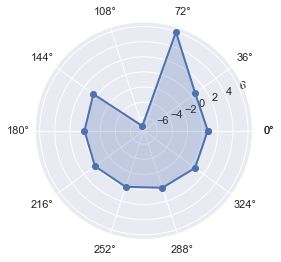

In [51]:
#Primero generamos una lista con los valores a representar
ricardo = features_mean['Ricardo'].to_list()
brenda = features_mean['Brenda'].to_list()

# Generamos los titulos y angulos requeridos
etiquetas =features_mean.index.to_list()
angulos = np.linspace(0,2*np.pi,len(etiquetas),endpoint=False)

# Tenemos que concatenar el primer valor con el ultimo para que podamos cerrar el circulo
ricardo = np.concatenate((ricardo,[ricardo[0]]))
brenda = np.concatenate((brenda,[brenda[0]]))
angulos = np.concatenate((angulos,[angulos[0]]))

plt.polar(angulos, brenda,'o-',linewidth=2)
plt.fill(angulos, brenda, alpha=0.25)
plt.thetagrids(angulos*180/np.pi,etiquetas)


ValueError: The number of FixedLocator locations (11), usually from a call to set_ticks, does not match the number of ticklabels (10).

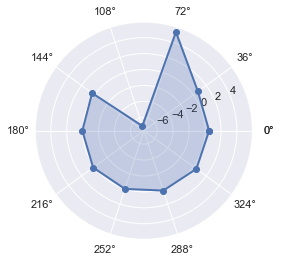

In [52]:
plt.polar(angulos, ricardo,'o-',linewidth=2)
plt.fill(angulos, ricardo, alpha=0.25)
plt.thetagrids(angulos*180/np.pi,etiquetas)
